In [1]:
import numpy as np
import h5py
import os, sys
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
import yaml
import argparse

sys.path.append('../')
import utils
import settings
eff = r"\textup{eff}"

In [2]:
#set tmin data
plot_titles = ["\pi","N"]
files1 = {"single-exponential":"pi0_1exp.dat","double-exponential":"pi0_2exp.dat"}
fit1 = 0.0660459
errs1 = [0.0656956,0.0663384]
files2 = {"single-exponential":"N0_1exp.dat","double-exponential":"N0_2exp.dat","geometric":"N0_geom.dat"}
fit2 = 0.313681
errs2 = [0.310819,0.316195]

In [3]:
#set effective energy data
eff_file1 = {"data":"pi0_Eff.dat","fit":"pi0_fit.dat"}
eff_file2 = {"data":"N0_Eff.dat","fit":"N0_fit.dat"}

In [4]:
#read data
dfs1 = {}
for key in files1.keys():
    dfs1[key] = pd.read_csv(files1[key]," ",header=None)
dfs2 = {}
for key in files2.keys():
    dfs2[key] = pd.read_csv(files2[key]," ",header=None)
dfs3 = {}
for key in eff_file1.keys():
    dfs3[key] = pd.read_csv(eff_file1[key]," ",header=None)
dfs4 = {}
for key in eff_file2.keys():
    dfs4[key] = pd.read_csv(eff_file2[key]," ",header=None)

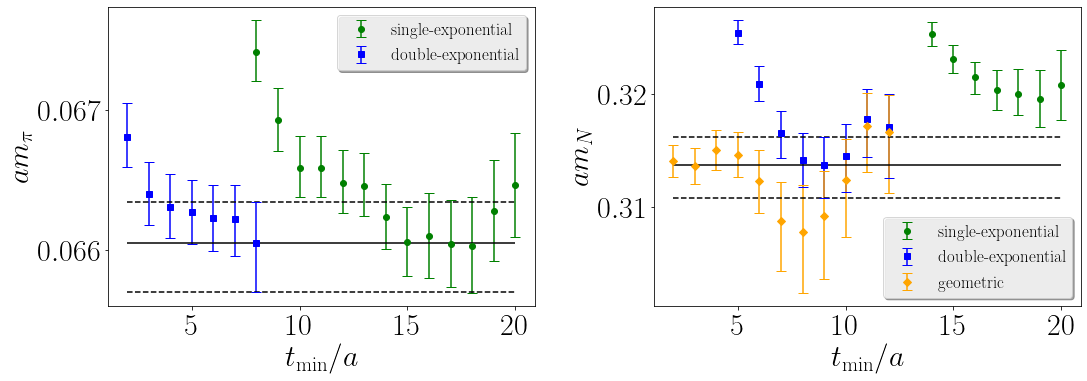

In [5]:
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(6)
dd=0.15
ddd = 0.06
minx = 10
maxx = 10

plt.style.use('../spectrum.mplstyle')

plt.subplot(1, 2, 1)
for i,label in enumerate(list(dfs1.keys())):
    minx = min(min(np.array(dfs1[label][0])),minx)
    maxx = max(max(np.array(dfs1[label][0])),maxx)
    plt.errorbar(np.array(dfs1[label][0]),np.array(dfs1[label][1]),np.concatenate([[np.array(dfs1[label][3])],[np.array(dfs1[label][2])]]),  capsize=5, color=settings.colors[i], marker=settings.markers[i],linestyle="", linewidth=0.0, elinewidth=1.5,label=label)

plt.hlines(fit1,minx,maxx,color="black")
for err in errs1:
    plt.hlines(err,minx,maxx,color="black",ls="--")

# plt.legend()
plt.xlabel(r"$t_{\textup{min}}/a$")
plt.ylabel(rf"$am_{{{plot_titles[0]}}}$")
plt.legend(loc="upper right")

minx = 10
maxx = 10

plt.subplot(1, 2, 2)
for i,label in enumerate(list(dfs2.keys())):
    minx = min(min(np.array(dfs2[label][0])),minx)
    maxx = max(max(np.array(dfs2[label][0])),maxx)
    plt.errorbar(np.array(dfs2[label][0]),np.array(dfs2[label][1]),np.concatenate([[np.array(dfs2[label][3])],[np.array(dfs2[label][2])]]),  capsize=5, color=settings.colors[i], marker=settings.markers[i],linestyle="", linewidth=0.0, elinewidth=1.5,label=label)

plt.hlines(fit2,minx,maxx,color="black")
for err in errs2:
    plt.hlines(err,minx,maxx,color="black",ls="--")
    
plt.legend(loc="lower right")
plt.xlabel(r"$t_{\textup{min}}/a$")
plt.ylabel(rf"$am_{{{plot_titles[1]}}}$")

plt.tight_layout()
plt.savefig("rest_masses.pdf")

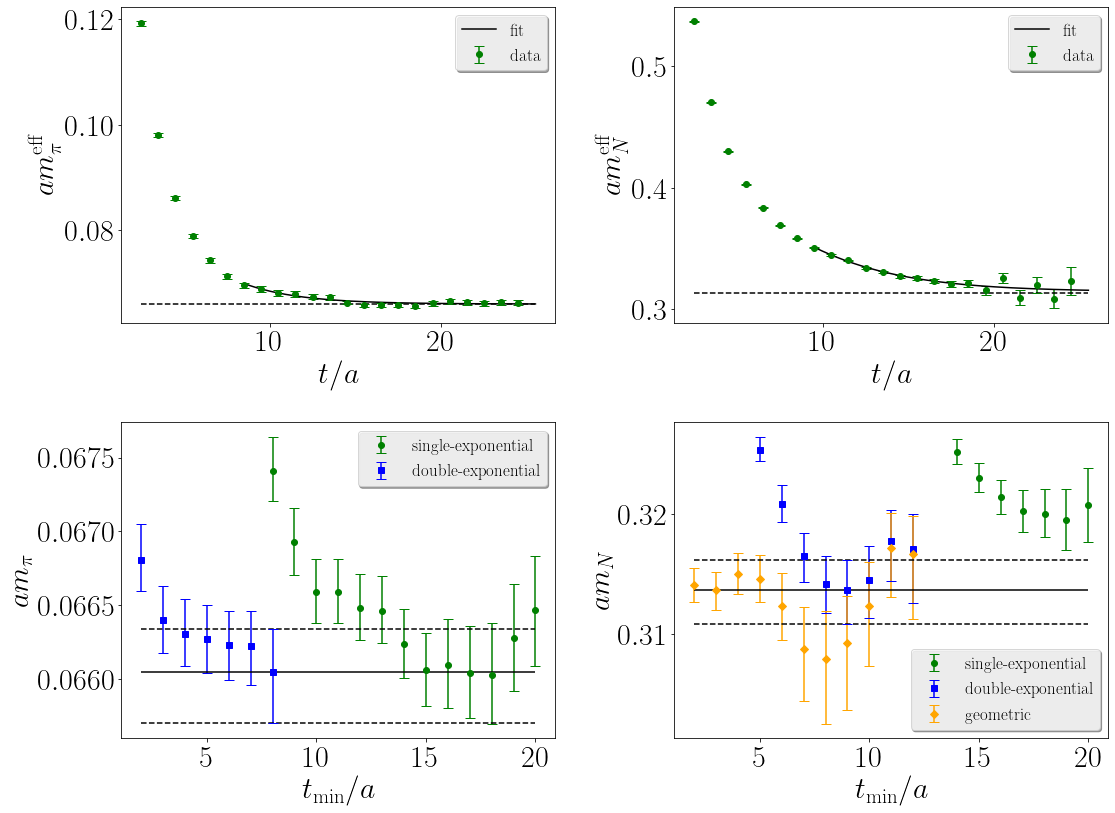

In [6]:
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(12)
dd=0.15
ddd = 0.06
minx = 10
maxx = 10

plt.style.use('../spectrum.mplstyle')

plt.subplot(2, 2, 1)
# for i,label in enumerate(list(dfs3.keys())):
label = "data"
i=0
minx = min(min(np.array(dfs3[label][0])),minx)
maxx = max(max(np.array(dfs3[label][0])),maxx)
plt.errorbar(np.array(dfs3[label][0]),np.array(dfs3[label][1]), np.array(dfs3[label][2]),  capsize=5, color=settings.colors[i], marker=settings.markers[i],linewidth=0.0, elinewidth=1.5,label=label)

label = "fit"
minx = min(min(np.array(dfs3[label][0])),minx)
maxx = max(max(np.array(dfs3[label][0])),maxx)
plt.plot(np.array(dfs3[label][0]),np.array(dfs3[label][1]), color="black",label=label)

plt.hlines(fit1,minx,maxx,color="black",ls="--")
# for err in errs1:
#     plt.hlines(err,minx,maxx,color="black",ls="--")

plt.xlabel(r"$t/a$")
plt.ylabel(rf"$am_{{{plot_titles[0]}}}^{{{eff}}}$")
plt.legend(loc="upper right")

minx = 10
maxx = 10

plt.subplot(2, 2, 2)
# for i,label in enumerate(list(dfs3.keys())):
label = "data"
i=0
minx = min(min(np.array(dfs4[label][0])),minx)
maxx = max(max(np.array(dfs4[label][0])),maxx)
plt.errorbar(np.array(dfs4[label][0]),np.array(dfs4[label][1]), np.array(dfs4[label][2]),  capsize=5, color=settings.colors[i], marker=settings.markers[i],linewidth=0.0, elinewidth=1.5,label=label)

label = "fit"
minx = min(min(np.array(dfs4[label][0])),minx)
maxx = max(max(np.array(dfs4[label][0])),maxx)
plt.plot(np.array(dfs4[label][0]),np.array(dfs4[label][1]), color="black",label=label)

plt.hlines(fit2,minx,maxx,color="black",ls="--")
# for err in errs1:
#     plt.hlines(err,minx,maxx,color="black",ls="--")

plt.xlabel(r"$t/a$")
plt.ylabel(rf"$am_{{{plot_titles[1]}}}^{{{eff}}}$")
plt.legend(loc="upper right")

minx = 10
maxx = 10

plt.subplot(2, 2, 3)
for i,label in enumerate(list(dfs1.keys())):
    minx = min(min(np.array(dfs1[label][0])),minx)
    maxx = max(max(np.array(dfs1[label][0])),maxx)
    plt.errorbar(np.array(dfs1[label][0]),np.array(dfs1[label][1]),np.concatenate([[np.array(dfs1[label][3])],[np.array(dfs1[label][2])]]),  capsize=5, color=settings.colors[i], marker=settings.markers[i], linewidth=0.0, elinewidth=1.5,label=label)

plt.hlines(fit1,minx,maxx,color="black")
for err in errs1:
    plt.hlines(err,minx,maxx,color="black",ls="--")

# plt.legend()
plt.xlabel(r"$t_{\textup{min}}/a$")
plt.ylabel(rf"$am_{{{plot_titles[0]}}}$")
plt.legend(loc="upper right")

minx = 10
maxx = 10

plt.subplot(2, 2, 4)
for i,label in enumerate(list(dfs2.keys())):
    minx = min(min(np.array(dfs2[label][0])),minx)
    maxx = max(max(np.array(dfs2[label][0])),maxx)
    plt.errorbar(np.array(dfs2[label][0]),np.array(dfs2[label][1]),np.concatenate([[np.array(dfs2[label][3])],[np.array(dfs2[label][2])]]),  capsize=5, color=settings.colors[i], marker=settings.markers[i],linewidth=0.0, elinewidth=1.5,label=label)

plt.hlines(fit2,minx,maxx,color="black")
for err in errs2:
    plt.hlines(err,minx,maxx,color="black",ls="--")
    
plt.legend(loc="lower right")
plt.xlabel(r"$t_{\textup{min}}/a$")
plt.ylabel(rf"$am_{{{plot_titles[1]}}}$")

plt.tight_layout()
plt.savefig("rest_masses2.pdf")

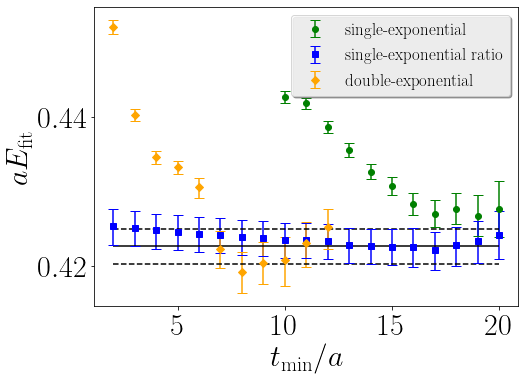

In [7]:
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(6)
dd=0.15
ddd = 0.06
minx = 10
maxx = 10

# plot_titles = ["\pi","N"]
# files1 = {"single-exponential":"isodoublet_GP3rot0_1exp.dat","single-exponential ratio":"isodoublet_GP3rot0_1expR.dat","double-exponential":"isodoublet_GP3rot0_2exp.dat"}
#1 = 0.356785
# errs1 = [0.35437,0.359036]

files = {"single-exponential":"isodoublet_GP3rot1_1exp.dat","single-exponential ratio":"isodoublet_GP3rot1_1expR.dat","double-exponential":"isodoublet_GP3rot1_2exp.dat"}
fit = 0.42267
errs = [0.420294,0.425024]

#read data
dfs = {}
for key in files.keys():
    dfs[key] = pd.read_csv(files[key]," ",header=None)

plt.style.use('../spectrum.mplstyle')
for i,label in enumerate(list(dfs.keys())):
    minx = min(min(np.array(dfs[label][0])),minx)
    maxx = max(max(np.array(dfs[label][0])),maxx)
    plt.errorbar(np.array(dfs[label][0]),np.array(dfs[label][1]),np.concatenate([[np.array(dfs[label][3])],[np.array(dfs[label][2])]]),  capsize=5, color=settings.colors[i], marker=settings.markers[i],linestyle="", linewidth=0.0, elinewidth=1.5,label=label)

plt.hlines(fit,minx,maxx,color="black")
for err in errs:
    plt.hlines(err,minx,maxx,color="black",ls="--")

# plt.legend()
plt.xlabel(r"$t_{\textup{min}}/a$")
plt.ylabel(r"$aE_{\textup{fit}}$")
    
plt.legend(loc="upper right")

plt.tight_layout()
plt.savefig("tmin_GP3_rot1.pdf")

In [8]:
#cls vs simon
def get_dataframes( these_files, sub_dir = "" ):
    these_dfs = {}
    if type(these_files)==dict:
        for key in these_files.keys():
            these_dfs[key] = get_dataframes(these_files[key],sub_dir)
        return these_dfs
    else:
        if sub_dir:
            return pd.read_csv(os.path.join(sub_dir,these_files)," ",header=None)
        else:
            return pd.read_csv(these_files," ",header=None)
sub_dir = "D200"
files = {
    "eff": {
        "pi":{
            "cls":"pi_data.dat",
            "simon":"pis_data.dat"
        },
        "k":{
            "cls":"k_data.dat",
            "simon":"ks_data.dat"
        },
        "N":{
            "cls":"N_data.dat",
            "simon":"Ns_data.dat"
        },
        "S":{
            "cls":"S_data.dat",
            "simon":"Ss_data.dat"
        }
    },
    "fit_form": {
        "pi":{
            "cls":"pi_fit.dat",
            "simon":"pis_fit.dat"
        },
        "k":{
            "cls":"k_fit.dat",
            "simon":"ks_fit.dat"
        },
        "N":{
            "cls":"N_fit.dat",
            "simon":"Ns_fit.dat"
        },
        "S":{
            "cls":"S_fit.dat",
            "simon":"Ss_fit.dat"
        }
    }
}

In [9]:
data = get_dataframes(files,sub_dir)

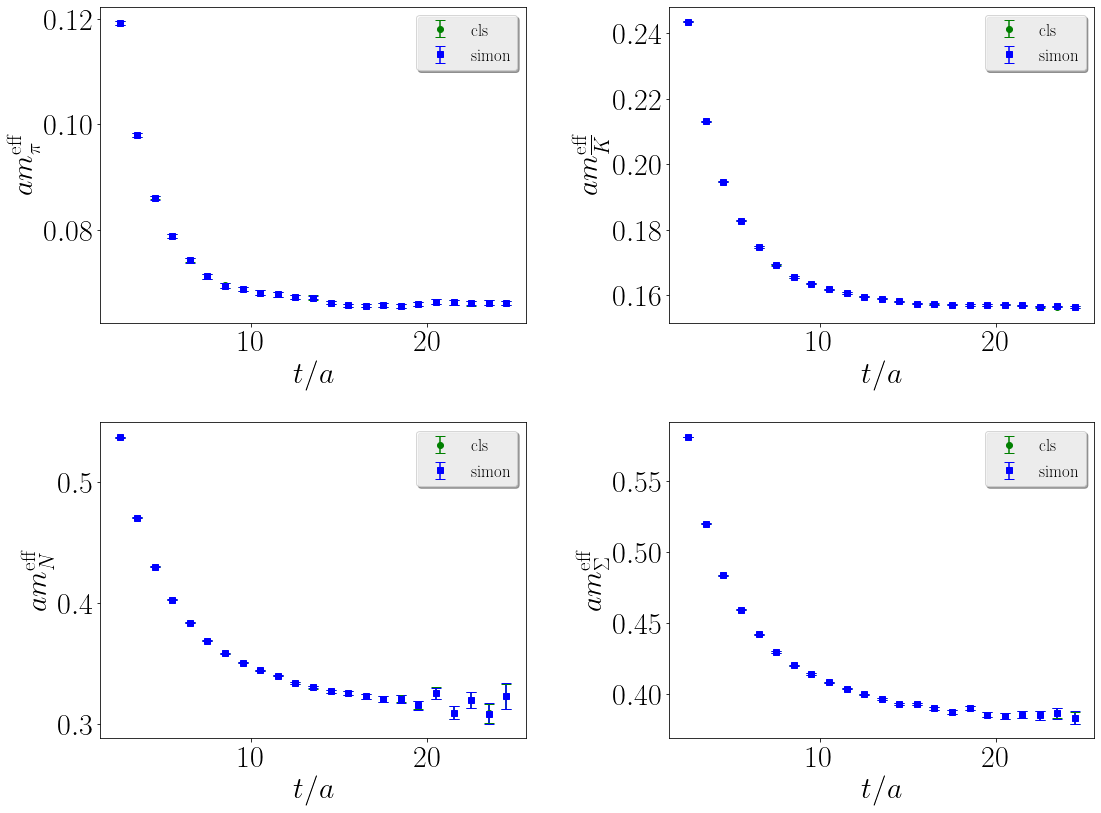

In [10]:
effs = data["eff"]

f = plt.figure()
f.set_figwidth(16)
f.set_figheight(12)
for j,particle in enumerate(list(effs.keys())):
    plt.style.use('../spectrum.mplstyle')
    plt.subplot( int((len(effs.keys())+1)/2), 2, j+1)
    for i,label in enumerate(list(effs[particle].keys())):
        plt.errorbar(np.array(effs[particle][label][0]),np.array(effs[particle][label][1]),np.array(effs[particle][label][2]),  capsize=5, color=settings.colors[i], marker=settings.markers[i], linewidth=0.0, elinewidth=1.5,label=label)
    plt.legend()
    plt.xlabel(r"$t/a$")
    lparticle = settings.latex_format[particle].replace('$',"")
    plt.ylabel(rf"$am_{{{lparticle}}}^{{\textup{{eff}}}}$")
    
plt.tight_layout()

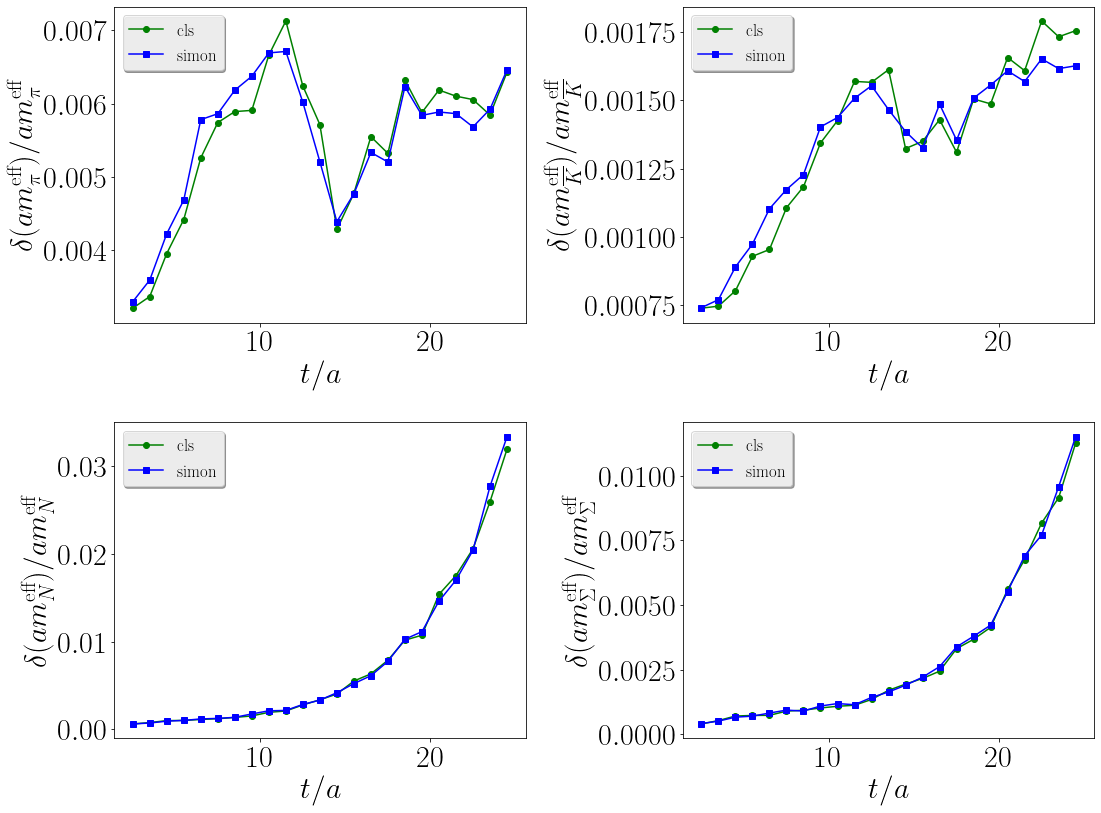

In [11]:
effs = data["eff"]

f = plt.figure()
f.set_figwidth(16)
f.set_figheight(12)
for j,particle in enumerate(list(effs.keys())):
    plt.style.use('../spectrum.mplstyle')
    plt.subplot( int((len(effs.keys())+1)/2), 2, j+1)
    for i,label in enumerate(list(effs[particle].keys())):
        plt.plot(np.array(effs[particle][label][0]),np.array(effs[particle][label][2])/np.array(effs[particle][label][1]), color=settings.colors[i], marker=settings.markers[i],label=label)
    plt.legend()
    plt.xlabel(r"$t/a$")
    lparticle = settings.latex_format[particle].replace('$',"")
    plt.ylabel(rf"$\delta(am_{{{lparticle}}}^{{\textup{{eff}}}})/am_{{{lparticle}}}^{{\textup{{eff}}}}$")
    
plt.tight_layout()

In [18]:
long_files = {
    "eff": {
        "pi":{
            "cls":"pi-long-j_data.dat",
            "simon":"pis-long-j_data.dat"
        }
    }
}
long_data = get_dataframes(long_files,sub_dir)

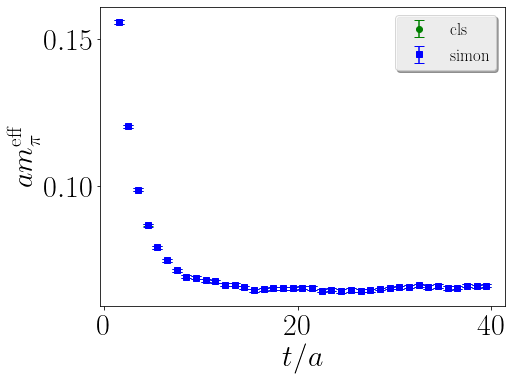

In [19]:
effs = long_data["eff"]

f = plt.figure()
f.set_figwidth(8)
f.set_figheight(6)
for j,particle in enumerate(list(effs.keys())):
    plt.style.use('../spectrum.mplstyle')
    plt.subplot( len(effs.keys()), 1, j+1)
    for i,label in enumerate(list(effs[particle].keys())):
        plt.errorbar(np.array(effs[particle][label][0]),np.array(effs[particle][label][1]),np.array(effs[particle][label][2]),  capsize=5, color=settings.colors[i], marker=settings.markers[i], linewidth=0.0, elinewidth=1.5,label=label)
    plt.legend()
    plt.xlabel(r"$t/a$")
    lparticle = settings.latex_format[particle].replace('$',"")
    plt.ylabel(rf"$am_{{{lparticle}}}^{{\textup{{eff}}}}$")
    
plt.tight_layout()

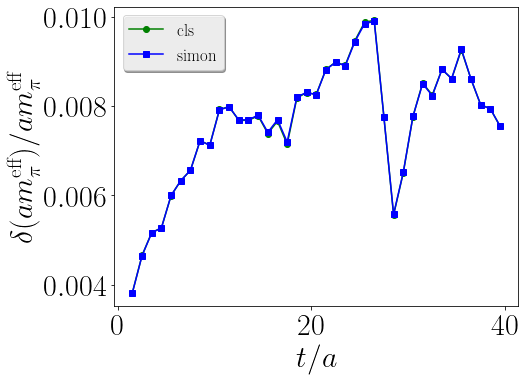

In [20]:
effs = long_data["eff"]

f = plt.figure()
f.set_figwidth(8)
f.set_figheight(6)
for j,particle in enumerate(list(effs.keys())):
    plt.style.use('../spectrum.mplstyle')
    plt.subplot( len(effs.keys()), 1, j+1)
    for i,label in enumerate(list(effs[particle].keys())):
        plt.plot(np.array(effs[particle][label][0]),np.array(effs[particle][label][2])/np.array(effs[particle][label][1]), color=settings.colors[i], marker=settings.markers[i],label=label)
    plt.legend()
    plt.xlabel(r"$t/a$")
    lparticle = settings.latex_format[particle].replace('$',"")
    plt.ylabel(rf"$\delta(am_{{{lparticle}}}^{{\textup{{eff}}}})/am_{{{lparticle}}}^{{\textup{{eff}}}}$")
    
plt.tight_layout()

In [38]:
j_files = {
    "eff": {
        "pi":{
            "bootstrap":"pis_data.dat",
            "jackknife":"pis-j_data.dat",
            "long-jackknife":"pis-long-j_data.dat"
        }
    }
}
j_data = get_dataframes(j_files,sub_dir)

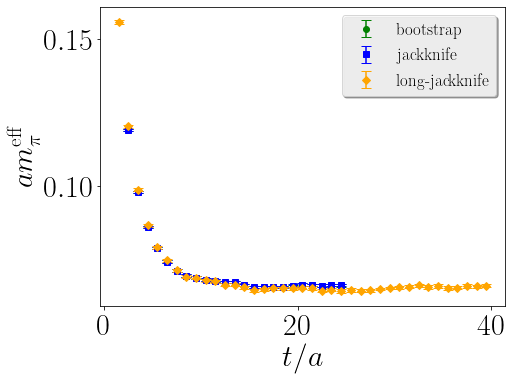

In [39]:
effs = j_data["eff"]

f = plt.figure()
f.set_figwidth(8)
f.set_figheight(6)
for j,particle in enumerate(list(effs.keys())):
    plt.style.use('../spectrum.mplstyle')
    plt.subplot( len(effs.keys()), 1, j+1)
    for i,label in enumerate(list(effs[particle].keys())):
        plt.errorbar(np.array(effs[particle][label][0]),np.array(effs[particle][label][1]),np.array(effs[particle][label][2]),  capsize=5, color=settings.colors[i], marker=settings.markers[i], linewidth=0.0, elinewidth=1.5,label=label)
    plt.legend()
    plt.xlabel(r"$t/a$")
    lparticle = settings.latex_format[particle].replace('$',"")
    plt.ylabel(rf"$am_{{{lparticle}}}^{{\textup{{eff}}}}$")
    
plt.tight_layout()

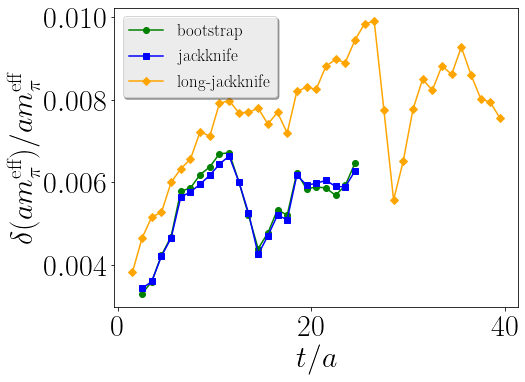

In [40]:
effs = j_data["eff"]

f = plt.figure()
f.set_figwidth(8)
f.set_figheight(6)
for j,particle in enumerate(list(effs.keys())):
    plt.style.use('../spectrum.mplstyle')
    plt.subplot( len(effs.keys()), 1, j+1)
    for i,label in enumerate(list(effs[particle].keys())):
        plt.plot(np.array(effs[particle][label][0]),np.array(effs[particle][label][2])/np.array(effs[particle][label][1]), color=settings.colors[i], marker=settings.markers[i],label=label)
    plt.legend()
    plt.xlabel(r"$t/a$")
    lparticle = settings.latex_format[particle].replace('$',"")
    plt.ylabel(rf"$\delta(am_{{{lparticle}}}^{{\textup{{eff}}}})/am_{{{lparticle}}}^{{\textup{{eff}}}}$")
    
plt.tight_layout()